In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


Observation- The dataset contains 1000 rows and 40 columns, The fraud_reported is "y" or "n" hence we will apply Logistic Regression here, also some value of the dataset is not numeric, first we will convert that values in numerical format which will be easy to analyse

In [3]:
df.shape

(1000, 40)

In [4]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [5]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [6]:
df.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,...,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


In [7]:
df.min()

months_as_customer                                   0
age                                                 19
policy_number                                   100804
policy_bind_date                            01-01-2006
policy_state                                        IL
policy_csl                                     100/300
policy_deductable                                  500
policy_annual_premium                           433.33
umbrella_limit                                -1000000
insured_zip                                     430104
insured_sex                                     FEMALE
insured_education_level                      Associate
insured_occupation                        adm-clerical
insured_hobbies                           base-jumping
insured_relationship                           husband
capital-gains                                        0
capital-loss                                   -111100
incident_date                               01-01-2015
incident_t

In [8]:
df.max()

months_as_customer                          479
age                                          64
policy_number                            999435
policy_bind_date                     31-12-2012
policy_state                                 OH
policy_csl                             500/1000
policy_deductable                          2000
policy_annual_premium                   2047.59
umbrella_limit                         10000000
insured_zip                              620962
insured_sex                                MALE
insured_education_level                     PhD
insured_occupation             transport-moving
insured_hobbies                        yachting
insured_relationship                       wife
capital-gains                            100500
capital-loss                                  0
incident_date                        31-01-2015
incident_type                     Vehicle Theft
collision_type                   Side Collision
incident_severity                Trivial

In [9]:
df.ndim

2

In [10]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [11]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

N    753
Y    247
Name: fraud_reported, dtype: int64


<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

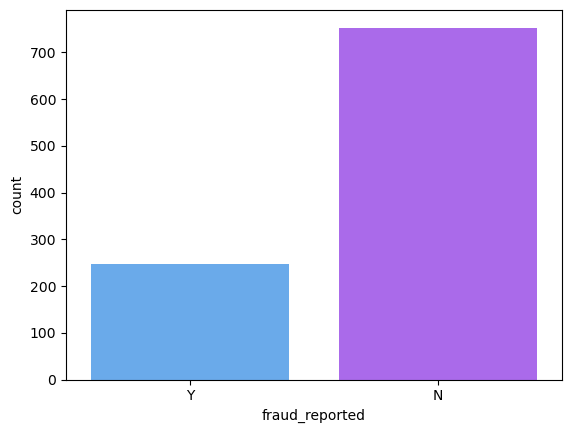

In [12]:
print(df['fraud_reported'].value_counts())
sns.countplot(df['fraud_reported'],palette="cool")

<AxesSubplot:>

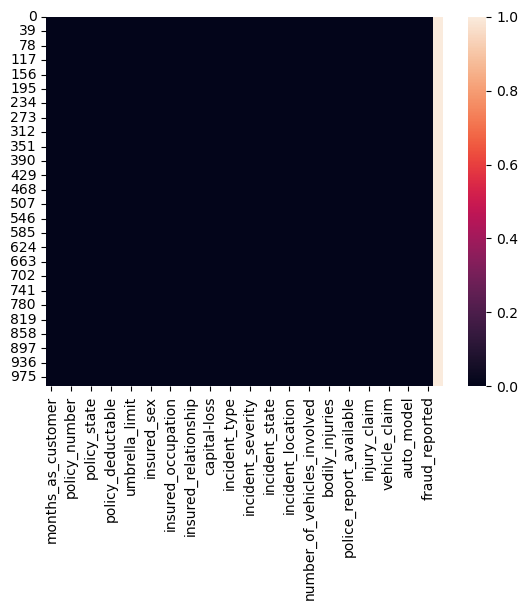

In [13]:
sns.heatmap(df.isnull())

In [14]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le=LabelEncoder()

In [17]:
df['policy_state']=le.fit_transform(df['policy_state'])

In [18]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,2,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,1,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,2,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,0,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,0,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,2,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,0,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,2,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,0,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [19]:
df.drop('policy_bind_date', axis=1, inplace=True)

In [20]:
df

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2,250/500,1000,1406.91,0,466132,MALE,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,1,250/500,2000,1197.22,5000000,468176,MALE,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2,100/300,2000,1413.14,5000000,430632,FEMALE,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,0,250/500,2000,1415.74,6000000,608117,FEMALE,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,0,500/1000,1000,1583.91,6000000,610706,MALE,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,2,500/1000,1000,1310.80,0,431289,FEMALE,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,0,100/300,1000,1436.79,0,608177,FEMALE,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2,250/500,500,1383.49,3000000,442797,FEMALE,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,0,500/1000,2000,1356.92,5000000,441714,MALE,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [21]:
df['policy_csl']=le.fit_transform(df['policy_csl'])

In [22]:
df

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2,1,1000,1406.91,0,466132,MALE,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,1,1,2000,1197.22,5000000,468176,MALE,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2,0,2000,1413.14,5000000,430632,FEMALE,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,0,1,2000,1415.74,6000000,608117,FEMALE,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,0,2,1000,1583.91,6000000,610706,MALE,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,2,2,1000,1310.80,0,431289,FEMALE,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,0,0,1000,1436.79,0,608177,FEMALE,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2,1,500,1383.49,3000000,442797,FEMALE,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,0,2,2000,1356.92,5000000,441714,MALE,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [23]:
df['insured_sex']=le.fit_transform(df['insured_sex'])

In [24]:
df

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2,1,1000,1406.91,0,466132,1,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,1,1,2000,1197.22,5000000,468176,1,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2,0,2000,1413.14,5000000,430632,0,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,0,1,2000,1415.74,6000000,608117,0,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,0,2,1000,1583.91,6000000,610706,1,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,2,2,1000,1310.80,0,431289,0,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,0,0,1000,1436.79,0,608177,0,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2,1,500,1383.49,3000000,442797,0,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,0,2,2000,1356.92,5000000,441714,1,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [25]:
df['police_report_available']=le.fit_transform(df['police_report_available'])

In [26]:
df

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2,1,1000,1406.91,0,466132,1,...,2,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,1,1,2000,1197.22,5000000,468176,1,...,0,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2,0,2000,1413.14,5000000,430632,0,...,1,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,0,1,2000,1415.74,6000000,608117,0,...,1,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,0,2,1000,1583.91,6000000,610706,1,...,1,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,2,2,1000,1310.80,0,431289,0,...,0,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,0,0,1000,1436.79,0,608177,0,...,0,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2,1,500,1383.49,3000000,442797,0,...,2,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,0,2,2000,1356.92,5000000,441714,1,...,2,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [27]:
df.auto_make.value_counts()

Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64

Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64


<AxesSubplot:xlabel='auto_make', ylabel='count'>

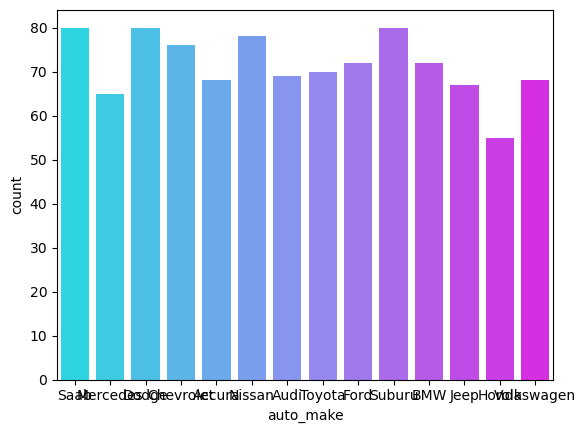

In [28]:
print(df['auto_make'].value_counts())
sns.countplot(df['auto_make'],palette ="cool")

In [29]:
df['auto_make']=le.fit_transform(df['auto_make'])

In [30]:
df

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2,1,1000,1406.91,0,466132,1,...,2,71610,6510,13020,52080,10,92x,2004,Y,NaN
1,228,42,342868,1,1,2000,1197.22,5000000,468176,1,...,0,5070,780,780,3510,8,E400,2007,Y,NaN
2,134,29,687698,2,0,2000,1413.14,5000000,430632,0,...,1,34650,7700,3850,23100,4,RAM,2007,N,NaN
3,256,41,227811,0,1,2000,1415.74,6000000,608117,0,...,1,63400,6340,6340,50720,3,Tahoe,2014,Y,NaN
4,228,44,367455,0,2,1000,1583.91,6000000,610706,1,...,1,6500,1300,650,4550,0,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,2,2,1000,1310.80,0,431289,0,...,0,87200,17440,8720,61040,6,Accord,2006,N,NaN
996,285,41,186934,0,0,1000,1436.79,0,608177,0,...,0,108480,18080,18080,72320,13,Passat,2015,N,NaN
997,130,34,918516,2,1,500,1383.49,3000000,442797,0,...,2,67500,7500,7500,52500,11,Impreza,1996,N,NaN
998,458,62,533940,0,2,2000,1356.92,5000000,441714,1,...,2,46980,5220,5220,36540,1,A5,1998,N,NaN


In [31]:
df.auto_model.value_counts()

RAM               43
Wrangler          42
A3                37
Neon              37
MDX               36
Jetta             35
Passat            33
A5                32
Legacy            32
Pathfinder        31
Malibu            30
92x               28
Camry             28
Forrestor         28
F150              27
95                27
E400              27
93                25
Grand Cherokee    25
Escape            24
Tahoe             24
Maxima            24
Ultima            23
X5                23
Highlander        22
Civic             22
Silverado         22
Fusion            21
ML350             20
Impreza           20
Corolla           20
TL                20
CRV               20
C300              18
3 Series          18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64

In [32]:
df['auto_model']=le.fit_transform(df['auto_model'])

In [33]:
df

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2,1,1000,1406.91,0,466132,1,...,2,71610,6510,13020,52080,10,1,2004,Y,NaN
1,228,42,342868,1,1,2000,1197.22,5000000,468176,1,...,0,5070,780,780,3510,8,12,2007,Y,NaN
2,134,29,687698,2,0,2000,1413.14,5000000,430632,0,...,1,34650,7700,3850,23100,4,30,2007,N,NaN
3,256,41,227811,0,1,2000,1415.74,6000000,608117,0,...,1,63400,6340,6340,50720,3,34,2014,Y,NaN
4,228,44,367455,0,2,1000,1583.91,6000000,610706,1,...,1,6500,1300,650,4550,0,31,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,2,2,1000,1310.80,0,431289,0,...,0,87200,17440,8720,61040,6,6,2006,N,NaN
996,285,41,186934,0,0,1000,1436.79,0,608177,0,...,0,108480,18080,18080,72320,13,28,2015,N,NaN
997,130,34,918516,2,1,500,1383.49,3000000,442797,0,...,2,67500,7500,7500,52500,11,19,1996,N,NaN
998,458,62,533940,0,2,2000,1356.92,5000000,441714,1,...,2,46980,5220,5220,36540,1,5,1998,N,NaN


In [34]:
df['fraud_reported']=le.fit_transform(df['fraud_reported'])

In [35]:
df

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2,1,1000,1406.91,0,466132,1,...,2,71610,6510,13020,52080,10,1,2004,1,NaN
1,228,42,342868,1,1,2000,1197.22,5000000,468176,1,...,0,5070,780,780,3510,8,12,2007,1,NaN
2,134,29,687698,2,0,2000,1413.14,5000000,430632,0,...,1,34650,7700,3850,23100,4,30,2007,0,NaN
3,256,41,227811,0,1,2000,1415.74,6000000,608117,0,...,1,63400,6340,6340,50720,3,34,2014,1,NaN
4,228,44,367455,0,2,1000,1583.91,6000000,610706,1,...,1,6500,1300,650,4550,0,31,2009,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,2,2,1000,1310.80,0,431289,0,...,0,87200,17440,8720,61040,6,6,2006,0,NaN
996,285,41,186934,0,0,1000,1436.79,0,608177,0,...,0,108480,18080,18080,72320,13,28,2015,0,NaN
997,130,34,918516,2,1,500,1383.49,3000000,442797,0,...,2,67500,7500,7500,52500,11,19,1996,0,NaN
998,458,62,533940,0,2,2000,1356.92,5000000,441714,1,...,2,46980,5220,5220,36540,1,5,1998,0,NaN


In [36]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_state                     int32
policy_csl                       int32
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                      int32
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day         int64
number_of_vehicles_involv

In [37]:
df['insured_education_level']=le.fit_transform(df['insured_education_level'])

In [38]:
df['insured_occupation']=le.fit_transform(df['insured_occupation'])

In [39]:
df['insured_hobbies']=le.fit_transform(df['insured_hobbies'])

In [40]:
df['insured_relationship']=le.fit_transform(df['insured_relationship'])

In [41]:
df['incident_type']=le.fit_transform(df['incident_type'])

In [42]:
df['collision_type']=le.fit_transform(df['collision_type'])

In [43]:
df['incident_severity']=le.fit_transform(df['incident_severity'])

In [44]:
df['authorities_contacted']=le.fit_transform(df['authorities_contacted'])

In [45]:
df['incident_state']=le.fit_transform(df['incident_state'])

In [46]:
df['incident_city']=le.fit_transform(df['incident_city'])

In [47]:
df['incident_location']=le.fit_transform(df['incident_location'])

In [48]:
df['property_damage']=le.fit_transform(df['property_damage'])

In [49]:
df['collision_type']=le.fit_transform(df['collision_type'])

In [50]:
df['collision_type']=le.fit_transform(df['collision_type'])

In [51]:
df

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2,1,1000,1406.91,0,466132,1,...,2,71610,6510,13020,52080,10,1,2004,1,NaN
1,228,42,342868,1,1,2000,1197.22,5000000,468176,1,...,0,5070,780,780,3510,8,12,2007,1,NaN
2,134,29,687698,2,0,2000,1413.14,5000000,430632,0,...,1,34650,7700,3850,23100,4,30,2007,0,NaN
3,256,41,227811,0,1,2000,1415.74,6000000,608117,0,...,1,63400,6340,6340,50720,3,34,2014,1,NaN
4,228,44,367455,0,2,1000,1583.91,6000000,610706,1,...,1,6500,1300,650,4550,0,31,2009,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,2,2,1000,1310.80,0,431289,0,...,0,87200,17440,8720,61040,6,6,2006,0,NaN
996,285,41,186934,0,0,1000,1436.79,0,608177,0,...,0,108480,18080,18080,72320,13,28,2015,0,NaN
997,130,34,918516,2,1,500,1383.49,3000000,442797,0,...,2,67500,7500,7500,52500,11,19,1996,0,NaN
998,458,62,533940,0,2,2000,1356.92,5000000,441714,1,...,2,46980,5220,5220,36540,1,5,1998,0,NaN


In [52]:
df.drop('incident_date', axis=1, inplace=True)

In [53]:
df

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2,1,1000,1406.91,0,466132,1,...,2,71610,6510,13020,52080,10,1,2004,1,NaN
1,228,42,342868,1,1,2000,1197.22,5000000,468176,1,...,0,5070,780,780,3510,8,12,2007,1,NaN
2,134,29,687698,2,0,2000,1413.14,5000000,430632,0,...,1,34650,7700,3850,23100,4,30,2007,0,NaN
3,256,41,227811,0,1,2000,1415.74,6000000,608117,0,...,1,63400,6340,6340,50720,3,34,2014,1,NaN
4,228,44,367455,0,2,1000,1583.91,6000000,610706,1,...,1,6500,1300,650,4550,0,31,2009,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,2,2,1000,1310.80,0,431289,0,...,0,87200,17440,8720,61040,6,6,2006,0,NaN
996,285,41,186934,0,0,1000,1436.79,0,608177,0,...,0,108480,18080,18080,72320,13,28,2015,0,NaN
997,130,34,918516,2,1,500,1383.49,3000000,442797,0,...,2,67500,7500,7500,52500,11,19,1996,0,NaN
998,458,62,533940,0,2,2000,1356.92,5000000,441714,1,...,2,46980,5220,5220,36540,1,5,1998,0,NaN


In [54]:
df.describe()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,...,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1.01400,0.951000,1136.000000,1256.406150,1.101000e+06,501214.488000,0.463000,...,0.971000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,19.318000,2005.103000,0.247000,NaN
std,115.113174,9.140287,257063.005276,0.83096,0.804516,611.864673,244.167395,2.297407e+06,71701.610941,0.498879,...,0.810442,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,11.136107,6.015861,0.431483,NaN
min,0.000000,19.000000,100804.000000,0.00000,0.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,...,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,1995.000000,0.000000,NaN
25%,115.750000,32.000000,335980.250000,0.00000,0.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,...,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,10.000000,2000.000000,0.000000,NaN
50%,199.500000,38.000000,533135.000000,1.00000,1.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,...,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,20.000000,2005.000000,0.000000,NaN
75%,276.250000,44.000000,759099.750000,2.00000,2.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,1.000000,...,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,29.000000,2010.000000,0.000000,NaN
max,479.000000,64.000000,999435.000000,2.00000,2.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,1.000000,...,2.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,2015.000000,1.000000,NaN


Observations :- Standard Deviation is high in maximum columns hence there is the possibilities of Outliers in this columns

mean>median in maximum columns ,column hence there is a possibilities of skewness in the data

There is a high difference in 75% and max value hence there is a possibility of outliers in dataset

In [55]:
dfcor=df.corr()
dfcor

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
months_as_customer,1.000000,0.922098,0.057555,-0.000328,-0.026819,0.026807,0.005018,0.015498,0.017895,0.060925,...,0.017647,0.062108,0.065329,0.034940,0.061013,0.047655,0.004202,-0.000292,0.020544,NaN
age,0.922098,1.000000,0.059413,-0.014533,-0.015185,0.029188,0.014404,0.018126,0.025604,0.073337,...,0.014661,0.069863,0.075522,0.060898,0.062588,0.030410,0.017343,0.001354,0.012143,NaN
policy_number,0.057555,0.059413,1.000000,0.072815,0.038917,-0.006738,0.022566,0.008968,0.007083,0.004564,...,0.032019,-0.018009,-0.008762,-0.010678,-0.020184,0.023860,0.065240,-0.000183,-0.029443,NaN
policy_state,-0.000328,-0.014533,0.072815,1.000000,0.001027,0.010033,0.012455,-0.029580,0.008777,-0.020481,...,0.071950,-0.006002,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.002114,0.029432,NaN
policy_csl,-0.026819,-0.015185,0.038917,0.001027,1.000000,0.003384,0.023978,0.021636,0.006879,-0.010757,...,0.002424,-0.055758,-0.078818,-0.042216,-0.046791,-0.004701,0.047885,-0.033082,-0.037190,NaN
policy_deductable,0.026807,0.029188,-0.006738,0.010033,0.003384,1.000000,-0.003245,0.010870,0.004545,-0.009733,...,0.030166,0.022839,0.039107,0.064792,0.005269,-0.035379,-0.003268,0.026105,0.014817,NaN
policy_annual_premium,0.005018,0.014404,0.022566,0.012455,0.023978,-0.003245,1.000000,-0.006247,0.032354,0.038853,...,0.013624,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.049226,-0.014480,NaN
umbrella_limit,0.015498,0.018126,0.008968,-0.029580,0.021636,0.010870,-0.006247,1.000000,0.019671,0.010688,...,-0.055951,-0.040344,-0.045412,-0.023790,-0.038584,-0.004443,0.040256,0.009893,0.058622,NaN
insured_zip,0.017895,0.025604,0.007083,0.008777,0.006879,0.004545,0.032354,0.019671,1.000000,-0.036942,...,-0.017607,-0.033873,-0.017495,-0.006841,-0.041083,-0.020892,0.023637,-0.032736,0.019368,NaN
insured_sex,0.060925,0.073337,0.004564,-0.020481,-0.010757,-0.009733,0.038853,0.010688,-0.036942,1.000000,...,0.020864,-0.023727,0.000924,-0.014868,-0.029609,0.026457,-0.018421,-0.028247,0.030873,NaN


<AxesSubplot:>

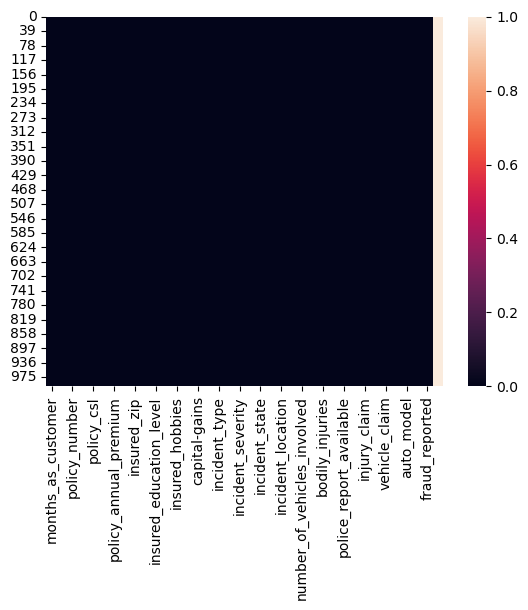

In [56]:
sns.heatmap(df.isnull())

In [57]:
df.drop('_c39', axis=1, inplace=True)

In [58]:
df

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2,1,1000,1406.91,0,466132,1,...,2,2,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,1,1,2000,1197.22,5000000,468176,1,...,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,687698,2,0,2000,1413.14,5000000,430632,0,...,3,1,34650,7700,3850,23100,4,30,2007,0
3,256,41,227811,0,1,2000,1415.74,6000000,608117,0,...,2,1,63400,6340,6340,50720,3,34,2014,1
4,228,44,367455,0,2,1000,1583.91,6000000,610706,1,...,1,1,6500,1300,650,4550,0,31,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,2,2,1000,1310.80,0,431289,0,...,1,0,87200,17440,8720,61040,6,6,2006,0
996,285,41,186934,0,0,1000,1436.79,0,608177,0,...,3,0,108480,18080,18080,72320,13,28,2015,0
997,130,34,918516,2,1,500,1383.49,3000000,442797,0,...,3,2,67500,7500,7500,52500,11,19,1996,0
998,458,62,533940,0,2,2000,1356.92,5000000,441714,1,...,1,2,46980,5220,5220,36540,1,5,1998,0


<AxesSubplot:>

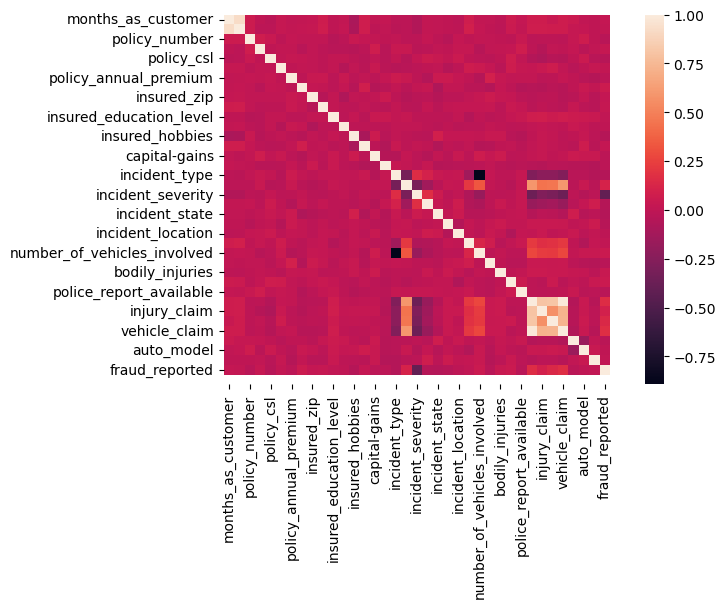

In [59]:
sns.heatmap(dfcor)

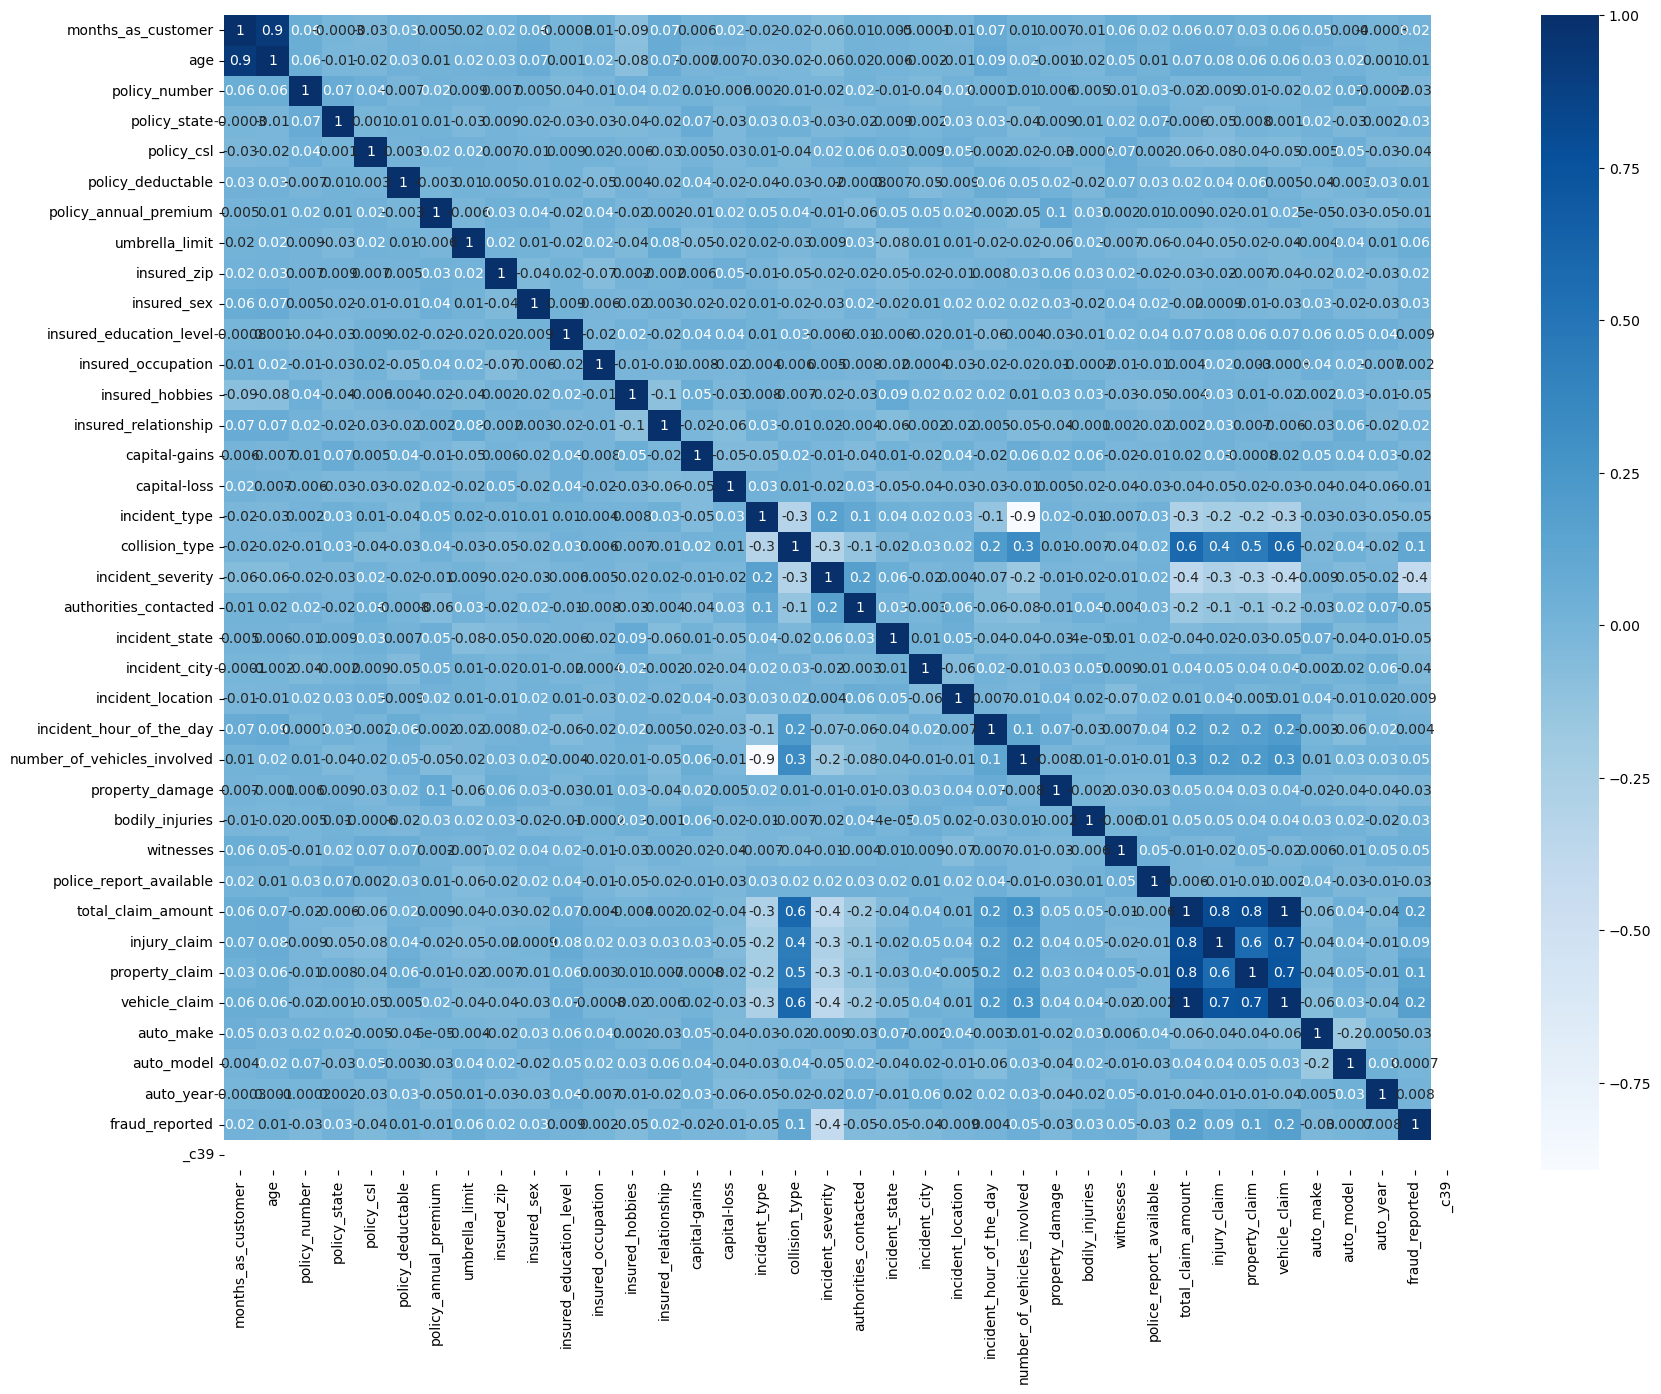

In [60]:
plt.figure(figsize=(20,15))
sns.heatmap(dfcor,cmap='Blues',fmt=".1g",annot= True)
plt.yticks(rotation=0);
plt.show()

months_as_customer                AxesSubplot(0.125,0.747241;0.0824468x0.132759)
age                            AxesSubplot(0.223936,0.747241;0.0824468x0.132759)
policy_number                  AxesSubplot(0.322872,0.747241;0.0824468x0.132759)
policy_state                   AxesSubplot(0.421809,0.747241;0.0824468x0.132759)
policy_csl                     AxesSubplot(0.520745,0.747241;0.0824468x0.132759)
policy_deductable              AxesSubplot(0.619681,0.747241;0.0824468x0.132759)
policy_annual_premium          AxesSubplot(0.718617,0.747241;0.0824468x0.132759)
umbrella_limit                 AxesSubplot(0.817553,0.747241;0.0824468x0.132759)
insured_zip                       AxesSubplot(0.125,0.587931;0.0824468x0.132759)
insured_sex                    AxesSubplot(0.223936,0.587931;0.0824468x0.132759)
insured_education_level        AxesSubplot(0.322872,0.587931;0.0824468x0.132759)
insured_occupation             AxesSubplot(0.421809,0.587931;0.0824468x0.132759)
insured_hobbies             

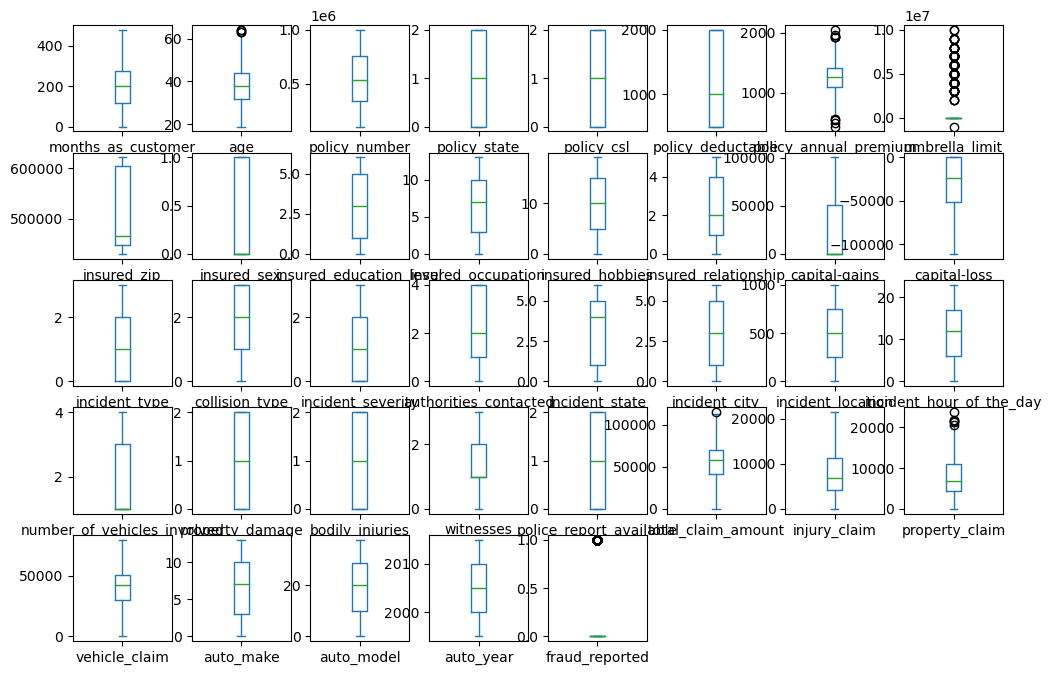

In [62]:
df.plot(kind='box',subplots=True,layout=(5,8),figsize=(12,8))

There are some outliers present every columns except "umbrella_limit", "property_claim", "policy_annual_premium"

Removing the outliers

In [63]:
from scipy.stats import zscore
out_features=df[['umbrella_limit','property_claim','policy_annual_premium']]
z=np.abs(zscore(out_features))
z

,umbrella_limit,property_claim,policy_annual_premium
0,0.479476,1.165505,0.616705
1,1.697980,1.372696,0.242521
2,1.697980,0.736072,0.642233
3,2.133471,0.219722,0.652886
4,2.133471,1.399654,1.341980
...,...,...,...
995,0.479476,0.273817,0.222884
996,0.479476,2.214794,0.739141
997,0.826998,0.020826,0.520739
998,1.697980,0.451976,0.411866


In [64]:
threshold=3
print(np.where(z>3))

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
       657, 700, 763, 875, 922, 975], dtype=int64), array([0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0],
      dtype=int64))


In [65]:
df_new=df[(z<3).all(axis=1)]
df_new

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2,1,1000,1406.91,0,466132,1,...,2,2,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,1,1,2000,1197.22,5000000,468176,1,...,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,687698,2,0,2000,1413.14,5000000,430632,0,...,3,1,34650,7700,3850,23100,4,30,2007,0
3,256,41,227811,0,1,2000,1415.74,6000000,608117,0,...,2,1,63400,6340,6340,50720,3,34,2014,1
4,228,44,367455,0,2,1000,1583.91,6000000,610706,1,...,1,1,6500,1300,650,4550,0,31,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,2,2,1000,1310.80,0,431289,0,...,1,0,87200,17440,8720,61040,6,6,2006,0
996,285,41,186934,0,0,1000,1436.79,0,608177,0,...,3,0,108480,18080,18080,72320,13,28,2015,0
997,130,34,918516,2,1,500,1383.49,3000000,442797,0,...,3,2,67500,7500,7500,52500,11,19,1996,0
998,458,62,533940,0,2,2000,1356.92,5000000,441714,1,...,1,2,46980,5220,5220,36540,1,5,1998,0


In [66]:
df_new.shape

(981, 37)

In [67]:
df=df_new
df

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2,1,1000,1406.91,0,466132,1,...,2,2,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,1,1,2000,1197.22,5000000,468176,1,...,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,687698,2,0,2000,1413.14,5000000,430632,0,...,3,1,34650,7700,3850,23100,4,30,2007,0
3,256,41,227811,0,1,2000,1415.74,6000000,608117,0,...,2,1,63400,6340,6340,50720,3,34,2014,1
4,228,44,367455,0,2,1000,1583.91,6000000,610706,1,...,1,1,6500,1300,650,4550,0,31,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,2,2,1000,1310.80,0,431289,0,...,1,0,87200,17440,8720,61040,6,6,2006,0
996,285,41,186934,0,0,1000,1436.79,0,608177,0,...,3,0,108480,18080,18080,72320,13,28,2015,0
997,130,34,918516,2,1,500,1383.49,3000000,442797,0,...,3,2,67500,7500,7500,52500,11,19,1996,0
998,458,62,533940,0,2,2000,1356.92,5000000,441714,1,...,1,2,46980,5220,5220,36540,1,5,1998,0


Checking for Skewness

In [68]:
df.skew()

months_as_customer             0.363268
age                            0.475942
policy_number                  0.038201
policy_state                  -0.038101
policy_csl                     0.098092
policy_deductable              0.473431
policy_annual_premium          0.034884
umbrella_limit                 1.803065
insured_zip                    0.838685
insured_sex                    0.141238
insured_education_level        0.006225
insured_occupation            -0.057292
insured_hobbies               -0.060134
insured_relationship           0.076242
capital-gains                  0.465985
capital-loss                  -0.390468
incident_type                  0.092461
collision_type                -0.195016
incident_severity              0.278443
authorities_contacted         -0.112301
incident_state                -0.147048
incident_city                  0.042537
incident_location             -0.002655
incident_hour_of_the_day      -0.038146
number_of_vehicles_involved    0.506989


The data must fall in the range of -0.5 to +0.5 Above it is the skewness

In [69]:
df['umbrella_limit']=np.cbrt(df['umbrella_limit'])

In [70]:
df.skew()

months_as_customer             0.363268
age                            0.475942
policy_number                  0.038201
policy_state                  -0.038101
policy_csl                     0.098092
policy_deductable              0.473431
policy_annual_premium          0.034884
umbrella_limit                 1.605531
insured_zip                    0.838685
insured_sex                    0.141238
insured_education_level        0.006225
insured_occupation            -0.057292
insured_hobbies               -0.060134
insured_relationship           0.076242
capital-gains                  0.465985
capital-loss                  -0.390468
incident_type                  0.092461
collision_type                -0.195016
incident_severity              0.278443
authorities_contacted         -0.112301
incident_state                -0.147048
incident_city                  0.042537
incident_location             -0.002655
incident_hour_of_the_day      -0.038146
number_of_vehicles_involved    0.506989


In [71]:
df.corr()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
months_as_customer,1.000000,0.922960,0.061414,-0.007179,-0.021865,0.030777,-0.003875,0.007978,0.029708,0.059770,...,0.063289,0.024700,0.058609,0.064864,0.036471,0.055831,0.049912,0.005350,0.001145,0.021375
age,0.922960,1.000000,0.062414,-0.020009,-0.013330,0.031851,0.005290,0.000839,0.035946,0.073857,...,0.056159,0.019540,0.067703,0.077002,0.062231,0.058842,0.033873,0.015456,0.005767,0.013338
policy_number,0.061414,0.062414,1.000000,0.071324,0.042022,-0.011445,0.028229,-0.004299,0.005578,0.008152,...,-0.007174,0.030845,-0.017120,-0.007545,-0.012333,-0.018839,0.018083,0.066096,-0.003594,-0.036190
policy_state,-0.007179,-0.020009,0.071324,1.000000,0.001651,0.017559,0.015079,-0.009350,0.020683,-0.017970,...,0.025779,0.072119,-0.014708,-0.048189,-0.006442,-0.006425,0.010283,-0.017956,-0.001116,0.034595
policy_csl,-0.021865,-0.013330,0.042022,0.001651,1.000000,0.009999,0.032677,0.012651,0.005529,-0.003467,...,0.071387,-0.005250,-0.054056,-0.079989,-0.042783,-0.043937,-0.009480,0.042770,-0.030441,-0.032542
policy_deductable,0.030777,0.031851,-0.011445,0.017559,0.009999,1.000000,-0.007754,0.005780,-0.005687,-0.008308,...,0.073531,0.028756,0.024955,0.039835,0.072395,0.006137,-0.029963,-0.004556,0.028073,0.014936
policy_annual_premium,-0.003875,0.005290,0.028229,0.015079,0.032677,-0.007754,1.000000,-0.009790,0.047286,0.040936,...,0.003949,0.022772,0.000082,-0.023726,-0.013674,0.009747,0.008776,-0.038708,-0.043022,-0.012900
umbrella_limit,0.007978,0.000839,-0.004299,-0.009350,0.012651,0.005780,-0.009790,1.000000,0.002419,0.017412,...,-0.004589,-0.039304,-0.043961,-0.043866,-0.019581,-0.045097,0.018145,0.012826,0.023172,0.049914
insured_zip,0.029708,0.035946,0.005578,0.020683,0.005529,-0.005687,0.047286,0.002419,1.000000,-0.037198,...,0.014868,-0.024090,-0.036066,-0.020359,-0.008837,-0.042890,-0.019223,0.023084,-0.039671,0.010215
insured_sex,0.059770,0.073857,0.008152,-0.017970,-0.003467,-0.008308,0.040936,0.017412,-0.037198,1.000000,...,0.037991,0.024299,-0.017024,0.007515,-0.009709,-0.023277,0.021281,-0.017329,-0.031674,0.021111


In [72]:
x=df.drop("fraud_reported", axis = 1)
y=df["fraud_reported"]

In [73]:
x

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,328,48,521585,2,1,1000,1406.91,0.000000,466132,1,...,1,2,2,71610,6510,13020,52080,10,1,2004
1,228,42,342868,1,1,2000,1197.22,170.997595,468176,1,...,0,0,0,5070,780,780,3510,8,12,2007
2,134,29,687698,2,0,2000,1413.14,170.997595,430632,0,...,2,3,1,34650,7700,3850,23100,4,30,2007
3,256,41,227811,0,1,2000,1415.74,181.712059,608117,0,...,1,2,1,63400,6340,6340,50720,3,34,2014
4,228,44,367455,0,2,1000,1583.91,181.712059,610706,1,...,0,1,1,6500,1300,650,4550,0,31,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,2,2,1000,1310.80,0.000000,431289,0,...,0,1,0,87200,17440,8720,61040,6,6,2006
996,285,41,186934,0,0,1000,1436.79,0.000000,608177,0,...,2,3,0,108480,18080,18080,72320,13,28,2015
997,130,34,918516,2,1,500,1383.49,144.224957,442797,0,...,2,3,2,67500,7500,7500,52500,11,19,1996
998,458,62,533940,0,2,2000,1356.92,170.997595,441714,1,...,0,1,2,46980,5220,5220,36540,1,5,1998


In [74]:
y

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 981, dtype: int32

In [75]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,1.070264,0.983956,-0.094588,1.180447,0.067197,-0.225968,0.619923,-0.479247,-0.483144,1.072994,...,0.001248,0.464781,1.267282,0.717821,-0.188645,1.174939,0.753457,0.852973,-1.638317,-0.186701
1,0.202991,0.329985,-0.788948,-0.024567,0.067197,1.410009,-0.248937,2.035351,-0.454490,1.072994,...,-1.222563,-1.333838,-1.204296,-1.809969,-1.362026,-1.379994,-1.825887,0.356523,-0.650052,0.311903
2,-0.612245,-1.086951,0.550801,1.180447,-1.176582,1.410009,0.645737,2.035351,-0.980807,-0.931972,...,1.225058,1.364090,0.031493,-0.686254,0.055042,-0.739173,-0.785546,-0.636377,0.967110,0.311903
3,0.445828,0.220990,-1.235972,-1.229581,0.067197,1.410009,0.656510,2.192912,1.507297,-0.931972,...,0.001248,0.464781,0.031493,0.405931,-0.223457,-0.219420,0.681233,-0.884602,1.326479,1.475311
4,0.202991,0.547975,-0.693421,-1.229581,1.310976,-0.225968,1.353331,2.192912,1.543591,1.072994,...,-1.222563,-0.434529,0.031493,-1.755645,-1.255541,-1.407130,-1.770657,-1.629278,1.056952,0.644305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,-1.748372,-0.105995,1.538248,1.180447,1.310976,-0.225968,0.221687,-0.479247,-0.971597,-0.931972,...,-1.222563,-0.434529,-1.204296,1.310069,2.049585,0.277372,1.229284,-0.139927,-1.189106,0.145701
977,0.697337,0.220990,-1.394790,-1.229581,-1.176582,-0.225968,0.743732,-0.479247,1.508138,-0.931972,...,1.225058,1.364090,-1.204296,2.118476,2.180643,2.231144,1.828316,1.597649,0.787425,1.641513
978,-0.646936,-0.541976,1.447586,1.180447,0.067197,-1.043957,0.522881,1.641647,-0.810270,-0.931972,...,1.225058,1.364090,1.267282,0.561686,0.014086,0.022714,0.775761,1.101198,-0.021156,-1.516311
979,2.197719,2.509887,-0.046586,-1.229581,1.310976,1.410009,0.412787,2.035351,-0.825452,1.072994,...,-1.222563,-0.434529,1.267282,-0.217849,-0.452809,-0.453205,-0.071806,-1.381053,-1.278948,-1.183908


In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i)
                  for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,6.897854,months_as_customer
1,6.919834,age
2,1.026679,policy_number
3,1.035769,policy_state
4,1.032432,policy_csl
5,1.040845,policy_deductable
6,1.038308,policy_annual_premium
7,1.035699,umbrella_limit
8,1.036330,insured_zip
9,1.026928,insured_sex


In [77]:
x.drop("incident_type", axis=1, inplace= True)

In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i)
                  for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,6.897029,months_as_customer
1,6.918226,age
2,1.025396,policy_number
3,1.035270,policy_state
4,1.031689,policy_csl
5,1.040143,policy_deductable
6,1.037857,policy_annual_premium
7,1.035689,umbrella_limit
8,1.034799,insured_zip
9,1.023428,insured_sex


In [79]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score
maxAccu = 0 
maxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    RFR =RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        
print("Best accuracy is",maxAccu,"at random_state",maxRS)

Best accuracy is 0.8203389830508474 at random_state 10


Spliting the data in x_train,x_test and y_train,y_test

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

In [82]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

In [83]:
RFC= RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.7966101694915254
[[220  12]
 [ 48  15]]
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       232
           1       0.56      0.24      0.33        63

    accuracy                           0.80       295
   macro avg       0.69      0.59      0.61       295
weighted avg       0.76      0.80      0.76       295



In [84]:
LR= LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.8101694915254237
[[219  13]
 [ 43  20]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       232
           1       0.61      0.32      0.42        63

    accuracy                           0.81       295
   macro avg       0.72      0.63      0.65       295
weighted avg       0.79      0.81      0.79       295



In [85]:
svc= SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7864406779661017
[[232   0]
 [ 63   0]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       232
           1       0.00      0.00      0.00        63

    accuracy                           0.79       295
   macro avg       0.39      0.50      0.44       295
weighted avg       0.62      0.79      0.69       295



Accuracy-78.64%

In [86]:
GB= GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.8372881355932204
[[209  23]
 [ 25  38]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       232
           1       0.62      0.60      0.61        63

    accuracy                           0.84       295
   macro avg       0.76      0.75      0.75       295
weighted avg       0.84      0.84      0.84       295



Accuracy- 82.72%

In [87]:
from sklearn.model_selection import cross_val_score

In [88]:
score=cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print("The difference between accuracy score and cross validation score is - ",accuracy_score(y_test,predRFC)- score.mean())

[0.78172589 0.72959184 0.73469388 0.77040816 0.78571429]
0.7604268103180358
The difference between accuracy score and cross validation score is -  0.03618335917348958


In [89]:
score=cross_val_score(LR,x,y)
print(score)
print(score.mean())
print("The difference between accuracy score and cross validation score is - ",accuracy_score(y_test,predLR)- score.mean())

[0.79695431 0.76530612 0.73469388 0.78571429 0.81122449]
0.7787786180462032
The difference between accuracy score and cross validation score is -  0.03139087347922054


In [90]:
score=cross_val_score(svc,x,y)
print(score)
print(score.mean())
print("The difference between accuracy score and cross validation score is - ",accuracy_score(y_test,predRFC)- score.mean())

[0.75634518 0.74489796 0.73469388 0.76020408 0.76020408]
0.7512690355329948
The difference between accuracy score and cross validation score is -  0.045341133958530566


In [91]:
score=cross_val_score(GB,x,y)
print(score)
print(score.mean())
print("The difference between accuracy score and cross validation score is - ",accuracy_score(y_test,predRFC)- score.mean())

[0.83248731 0.81122449 0.80612245 0.85204082 0.86734694]
0.8338444007044442
The difference between accuracy score and cross validation score is -  -0.0372342312129188


# Result: We will consider Gradient Boosting Classifier because the accuracy is 82.72%